In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [75]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [76]:
df.duplicated(keep='first')

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [78]:
df['Gender'] = df['Gender'] .replace(['Male', 'Female'], [0, 1])

d:\armpongpon\customer_segmentation\customer_segmentenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


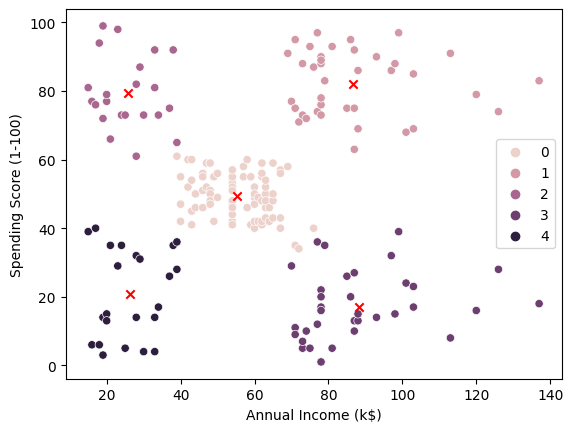

In [79]:
from sklearn.cluster import KMeans

features = df[['Annual Income (k$)', 'Spending Score (1-100)']]

k = 5 

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(features)
labels=kmeans.labels_

sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],hue=labels)
plt.scatter(kmeans.cluster_centers_[:, 0] , kmeans.cluster_centers_[:, 1], marker='x', color='red')

In [80]:
df['Gender'] = df['Gender'] .replace([1, 0], ['Male', 'Female'])

In [81]:
df['Cluster'] = kmeans.predict(df[['Annual Income (k$)','Spending Score (1-100)']])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Female,19,15,39,4
1,2,Female,21,15,81,2
2,3,Male,20,16,6,4
3,4,Male,23,16,77,2
4,5,Male,31,17,40,4
